In [70]:
import pandas as pd 
import numpy as nd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline


In [2]:
drug_df = pd.read_csv("train.csv")

In [3]:
drug_df.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status
0,140736,T51115,D0L4YD,Small molecular drug,Approved,Solifenacin,154059,Overactive bladder,Approved,CAC1C_HUMAN,Voltage-gated calcium channel alpha Cav1.2 (CA...,CACNA1C,Voltage-gated calcium channel subunit alpha Ca...,Mediates influx of calcium ions into the cytop...,Voltage-gated ion channel,MVNENTRMYIPEENHQGSNYGSPRPAHANMNANAAAGLAPEHIPTP...,Genetic cardiac arrhythmia,Q13936,Terminated
1,133048,T60529,D03NMM,Small molecular drug,Investigative,AM-643,46843035,Dermatological disease,Investigative,PGH1_HUMAN,Prostaglandin G/H synthase 1 (COX-1),PTGS1,Prostaglandin-endoperoxide synthase 1; Prostag...,Converts arachidonate to prostaglandin H2 (PGH...,Paired donor oxygen oxidoreductase,MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGIC...,Rheumatoid arthritis,P23219,Approved
2,60493,T80975,D0T2ER,Small molecular drug,Phase 1,TAK-593,24767976,Solid tumour/cancer,Phase 1,VGFR2_HUMAN,Vascular endothelial growth factor receptor 2 ...,KDR,VEGFR2; VEGFR-2; VEGF-2 receptor; Protein-tyro...,Plays an essential role in the regulation of a...,Kinase,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,Renal cell carcinoma,P35968,Approved
3,169176,T92072,D07ESH,Small molecular drug,Discontinued in Phase 3,PF-1913539,176408,Alzheimer disease,Discontinued in Phase 3,AA1R_HUMAN,Adenosine A1 receptor (ADORA1),ADORA1,Adenosine receptor A1; A(1) adenosine receptor,The activity of this receptor is mediated by G...,GPCR rhodopsin,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,Hyper-lipoproteinaemia,P30542,Phase 2
4,120183,T30082,D0Q0RC,Small molecular drug,Approved,Ethopropazine,3290,Parkinson disease,Approved,ACES_HUMAN,Acetylcholinesterase (AChE),ACHE,YT; N-ACHE; ARACHE,Role in neuronal apoptosis. Terminates signal ...,Carboxylic ester hydrolase,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,Oesophageal/gastroduodenal disorder,P22303,Approved


In [5]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134486 entries, 0 to 134485
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         134486 non-null  int64 
 1   TargetID                   134486 non-null  object
 2   DRUGID                     134486 non-null  object
 3   DRUGTYPE                   134486 non-null  object
 4   Drug_high_status           134486 non-null  object
 5   DRUGNAME                   134486 non-null  object
 6   PUBCHCID                   134486 non-null  int64 
 7   Disease_of_highest_status  134486 non-null  object
 8   Drug_Status                134486 non-null  object
 9   UNIPROID                   134486 non-null  object
 10  TARGNAME                   134486 non-null  object
 11  GENENAME                   134486 non-null  object
 12  SYNONYMS                   134486 non-null  object
 13  FUNCTION                   134486 non-null  

In [8]:
label_en=LabelEncoder()
select_cols=['TargetID','DRUGID','DRUGTYPE','Drug_high_status','DRUGNAME','PUBCHCID','Disease_of_highest_status','Drug_Status',
             'UNIPROID','TARGNAME','GENENAME','SYNONYMS','FUNCTION','BIOCLASS','SEQUENCE','Disease','Accession Number'
             ,'Target_Status']

for ele in select_cols:
    drug_df[ele]=label_en.fit_transform(drug_df[ele])

In [9]:
drug_df.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status
0,140736,332,1645,4,0,2076,889,485,1,102,676,92,583,376,101,662,220,547,31
1,133048,402,394,4,11,76,2231,177,12,516,505,554,296,145,72,600,487,256,1
2,60493,547,2049,4,14,2125,2059,592,15,689,668,371,564,435,58,513,479,363,1
3,169176,636,760,4,8,1621,925,41,9,16,24,17,7,604,45,488,248,316,22
4,120183,210,1889,4,0,807,145,494,1,26,19,9,603,557,28,537,407,249,1


In [12]:
corr_mat =drug_df[['Drug_high_status','Drug_Status']]
print(corr_mat)

        Drug_high_status  Drug_Status
0                      0            1
1                     11           12
2                     14           15
3                      8            9
4                      0            1
...                  ...          ...
134481                17           17
134482                16           16
134483                 0           21
134484                 0           15
134485                 3            4

[134486 rows x 2 columns]


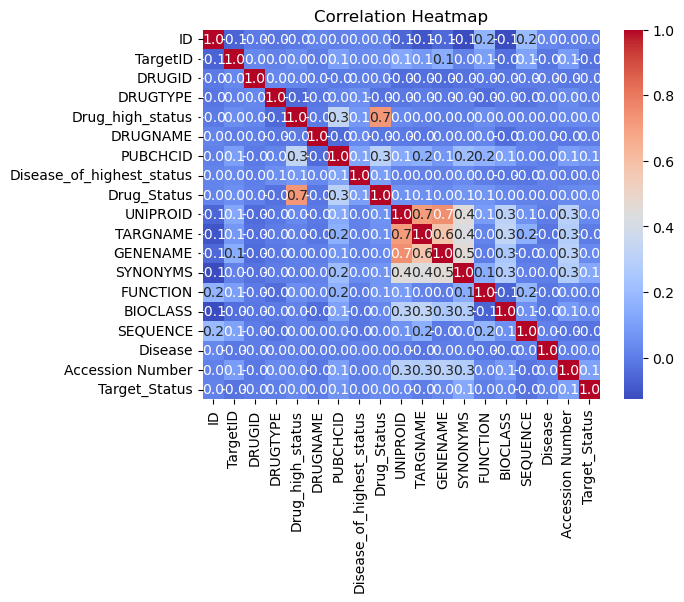

In [19]:

sns.heatmap(drug_df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()
     

In [20]:
drug_df.columns

Index(['ID', 'TargetID', 'DRUGID', 'DRUGTYPE', 'Drug_high_status', 'DRUGNAME',
       'PUBCHCID', 'Disease_of_highest_status', 'Drug_Status', 'UNIPROID',
       'TARGNAME', 'GENENAME', 'SYNONYMS', 'FUNCTION', 'BIOCLASS', 'SEQUENCE',
       'Disease', 'Accession Number', 'Target_Status'],
      dtype='object')

## Implementing Logistic Regression

In [88]:
X1=drug_df[['ID','DRUGNAME','DRUGTYPE','GENENAME','Drug_high_status','Disease_of_highest_status','Drug_Status','BIOCLASS','Disease','SEQUENCE','TARGNAME']]
Y1=drug_df['Target_Status']

In [89]:
# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2,random_state=42)


In [90]:
model_1=LogisticRegression()
model_1.fit(X1_train,Y1_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
Y1_predict=model_1.predict(X1_test)
acc_1=accuracy_score(Y1_test,Y1_predict)
cfmat_1=confusion_matrix(Y1_test,Y1_predict)
class_report_1=classification_report(Y1_test,Y1_predict)

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [92]:
print(acc_1)

0.23206186333556397


In [93]:
print(cfmat_1)

[[   0    8    0 ...    0    0    0]
 [   0 4279    0 ...    0    0    0]
 [   0   26    0 ...    0    0    0]
 ...
 [   0   22    0 ...    0    0    0]
 [   0  715    0 ...    0    0    0]
 [   0  230    0 ...    0    0    0]]


In [94]:
print(class_report_1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.23      0.69      0.35      6168
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        70
           5       0.00      0.00      0.00       475
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00      1177
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00       506
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        16
          14       0.00      0.00      0.00      1866
          15       0.00      0.00      0.00       628
          16       0.00      0.00      0.00         3
          17       0.00    

# Implementing Random Forest Classifier

In [95]:
drug_df.columns

Index(['ID', 'TargetID', 'DRUGID', 'DRUGTYPE', 'Drug_high_status', 'DRUGNAME',
       'PUBCHCID', 'Disease_of_highest_status', 'Drug_Status', 'UNIPROID',
       'TARGNAME', 'GENENAME', 'SYNONYMS', 'FUNCTION', 'BIOCLASS', 'SEQUENCE',
       'Disease', 'Accession Number', 'Target_Status'],
      dtype='object')

In [110]:
X2=drug_df[['ID','DRUGNAME','DRUGTYPE','Drug_high_status','Disease_of_highest_status','Drug_Status','BIOCLASS','Disease','TARGNAME']]
Y2=drug_df['Target_Status']
# Dropped from the COlumns : TARGETID, DRUGID,PUBCHID,SYNONYMS,FUNCTION,ACCESSION NUMBER,UNIPROID,GENENAME,SEQUENCE

In [111]:
# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2)


In [112]:
randomfc_1=RandomForestClassifier()
randomfc_1.fit(X2_train,Y2_train)

In [106]:
Y2_predict=randomfc_1.predict(X2_test)
acc_2=accuracy_score(Y2_test,Y2_predict)
cfmat_2=confusion_matrix(Y2_test,Y2_predict)
class_report_2=classification_report(Y2_test,Y2_predict)

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
print(acc_2)

0.8695070265447246


In [108]:
print(class_report_2)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.86      0.92      0.89      6168
           2       0.95      0.66      0.78        32
           3       1.00      1.00      1.00         1
           4       0.89      0.73      0.80        70
           5       0.86      0.81      0.83       475
           6       0.68      0.71      0.69        24
           7       0.87      0.82      0.84      1177
           8       0.50      0.36      0.42        11
           9       0.75      1.00      0.86         3
          10       0.83      0.73      0.78       506
          11       1.00      0.50      0.67         4
          12       0.94      0.75      0.83        20
          13       1.00      1.00      1.00        16
          14       0.87      0.83      0.85      1866
          15       0.90      0.93      0.91       628
          16       1.00      0.33      0.50         3
          17       0.87    